## 📦 Importing Required Libraries

We start by importing the core Python libraries used for data processing and visualization. These include:

- **Pandas** for data manipulation  
- **NumPy** for numerical operations  
- **Seaborn & Matplotlib** for static plots  
- **Plotly & Cufflinks** for interactive visualizations  
- **CategoricalDtype** for ordered category sorting (e.g., months)

We also list all input files available in the Kaggle environment.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/cyclistics-historical-trip-data/2021_07-divvy-tripdata.csv
/kaggle/input/cyclistics-historical-trip-data/2020_11-divvy-tripdata.csv
/kaggle/input/cyclistics-historical-trip-data/2021_03-divvy-tripdata.csv
/kaggle/input/cyclistics-historical-trip-data/2021_01-divvy-tripdata.csv
/kaggle/input/cyclistics-historical-trip-data/2020_12-divvy-tripdata.csv
/kaggle/input/cyclistics-historical-trip-data/2020_10-divvy-tripdata.csv
/kaggle/input/cyclistics-historical-trip-data/2021_08-divvy-tripdata.csv
/kaggle/input/cyclistics-historical-trip-data/2021_04-divvy-tripdata.csv
/kaggle/input/cyclistics-historical-trip-data/2021_09-divvy-tripdata.csv
/kaggle/input/cyclistics-historical-trip-data/2021_02-divvy-tripdata.csv
/kaggle/input/cyclistics-historical-trip-data/2021_05-divvy-tripdata.csv
/kaggle/input/cyclistics-historical-trip-data/2021_06-divvy-tripdata.csv
/kaggle/input/cyclistic-bike-share-analysis-case-study-python/__results__.html
/kaggle/input/cyclistic-bike-share-analysis-c

In [2]:
import pandas as pd
from pandas.api.types import CategoricalDtype

import seaborn as sns

import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

import cufflinks as cf

# Importing Necessary Python Libraries

## 📥 Loading Monthly Ride Data

The dataset is split into 12 separate CSV files, each representing one month of Cyclistic ride data. We load each file into a separate DataFrame.

In [3]:
Oct_2020 = pd.read_csv('../input/cyclistics-historical-trip-data/2020_10-divvy-tripdata.csv')
Nov_2020 = pd.read_csv('../input/cyclistics-historical-trip-data/2020_11-divvy-tripdata.csv')
Dec_2020 = pd.read_csv('../input/cyclistics-historical-trip-data/2020_12-divvy-tripdata.csv')
Jan_2021 = pd.read_csv('../input/cyclistics-historical-trip-data/2021_01-divvy-tripdata.csv')
Feb_2021 = pd.read_csv('../input/cyclistics-historical-trip-data/2021_02-divvy-tripdata.csv')
Mar_2021 = pd.read_csv('../input/cyclistics-historical-trip-data/2021_03-divvy-tripdata.csv')
Apl_2021 = pd.read_csv('../input/cyclistics-historical-trip-data/2021_04-divvy-tripdata.csv')
May_2021 = pd.read_csv('../input/cyclistics-historical-trip-data/2021_05-divvy-tripdata.csv')
Jun_2021 = pd.read_csv('../input/cyclistics-historical-trip-data/2021_06-divvy-tripdata.csv')
Jul_2021 = pd.read_csv('../input/cyclistics-historical-trip-data/2021_07-divvy-tripdata.csv')
Aug_2021 = pd.read_csv('../input/cyclistics-historical-trip-data/2021_08-divvy-tripdata.csv')
Sep_2021 = pd.read_csv('../input/cyclistics-historical-trip-data/2021_09-divvy-tripdata.csv')

# Importing 12 CSV files.

## 🔗 Combining All Monthly Files into One Dataset

Using `pd.concat()`, we combine all 12 individual DataFrames into one master DataFrame named `df`. This will allow us to perform uniform analysis on the entire year’s data.

In [4]:
df = pd.concat([Oct_2020,Nov_2020,Dec_2020,Jan_2021,Feb_2021,Mar_2021,Apl_2021,May_2021,Jun_2021,Jul_2021,Aug_2021,Sep_2021], ignore_index = True)

# Joining 12 CSV's into 1 and naming it as "df".

df

# Top 5 & bottom 5 rows of dataframe "df".

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,ACB6B40CF5B9044C,electric_bike,2020-10-31 19:39:43,2020-10-31 19:57:12,Lakeview Ave & Fullerton Pkwy,313.0,Rush St & Hubbard St,125.0,41.926101,-87.638977,41.890345,-87.626068,casual
1,DF450C72FD109C01,electric_bike,2020-10-31 23:50:08,2020-11-01 00:04:16,Southport Ave & Waveland Ave,227.0,Kedzie Ave & Milwaukee Ave,260.0,41.948172,-87.663911,41.929528,-87.707818,casual
2,B6396B54A15AC0DF,electric_bike,2020-10-31 23:00:01,2020-10-31 23:08:22,Stony Island Ave & 67th St,102.0,University Ave & 57th St,423.0,41.773462,-87.585372,41.791455,-87.600050,casual
3,44A4AEE261B9E854,electric_bike,2020-10-31 22:16:43,2020-10-31 22:19:35,Clark St & Grace St,165.0,Broadway & Sheridan Rd,256.0,41.950855,-87.659244,41.952809,-87.650103,casual
4,10B7DD76A6A2EB95,electric_bike,2020-10-31 19:38:19,2020-10-31 19:54:32,Southport Ave & Wrightwood Ave,190.0,Stave St & Armitage Ave,185.0,41.928857,-87.663962,41.917777,-87.691434,casual
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5136256,FA66BCAB0D73DDC2,classic_bike,2021-09-22 15:46:57,2021-09-22 16:01:15,Ellis Ave & 83rd St,584,Stony Island Ave & 75th St,KA1503000019,41.744123,-87.599034,41.758670,-87.586883,casual
5136257,1D44DEFB5D36CA04,classic_bike,2021-09-25 16:25:23,2021-09-25 16:40:29,Ellis Ave & 60th St,KA1503000014,Shore Dr & 55th St,TA1308000009,41.785097,-87.601073,41.795212,-87.580715,casual
5136258,6A346EA57FC23C45,classic_bike,2021-09-25 16:26:05,2021-09-25 16:40:30,Ellis Ave & 60th St,KA1503000014,Shore Dr & 55th St,TA1308000009,41.785097,-87.601073,41.795212,-87.580715,casual
5136259,49360AFD771100A6,classic_bike,2021-09-15 17:57:48,2021-09-15 18:24:06,Ellis Ave & 60th St,KA1503000014,Shore Dr & 55th St,TA1308000009,41.785097,-87.601073,41.795212,-87.580715,casual


## 🧹 Dropping Irrelevant Columns

We remove columns that are not needed for our analysis such as station names, station IDs, and latitude/longitude coordinates. This simplifies our dataset and focuses only on behavioral metrics.

In [5]:
df = df.drop(columns=[
    'start_station_name', 'start_station_id', 
    'end_station_name', 'end_station_id', 
    'start_lat', 'start_lng', 'end_lat', 'end_lng'
], errors='ignore')

# Deleting Columns which are not relevant for my analysis.

df.tail() 

,ride_id,rideable_type,started_at,ended_at,member_casual
5136256,FA66BCAB0D73DDC2,classic_bike,2021-09-22 15:46:57,2021-09-22 16:01:15,casual
5136257,1D44DEFB5D36CA04,classic_bike,2021-09-25 16:25:23,2021-09-25 16:40:29,casual
5136258,6A346EA57FC23C45,classic_bike,2021-09-25 16:26:05,2021-09-25 16:40:30,casual
5136259,49360AFD771100A6,classic_bike,2021-09-15 17:57:48,2021-09-15 18:24:06,casual
5136260,343190A2DC023FED,electric_bike,2021-09-11 18:01:06,2021-09-11 18:08:26,member


## ⏱️ Creating Ride Duration Column: `ride_length`

We calculate the ride length in minutes by subtracting `started_at` from `ended_at`, and convert the result to integer minutes. This new column will be essential for our user behavior analysis.

In [6]:
df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])

df['ride_length'] = (df['ended_at'] - df['started_at']) / pd.Timedelta(minutes=1)

df = df[df['ride_length'] > 0] 

# Optional: remove invalid durations

df['ride_length'] = df['ride_length'].astype('int32')

df.head()

,ride_id,rideable_type,started_at,ended_at,member_casual,ride_length
0,ACB6B40CF5B9044C,electric_bike,2020-10-31 19:39:43,2020-10-31 19:57:12,casual,17
1,DF450C72FD109C01,electric_bike,2020-10-31 23:50:08,2020-11-01 00:04:16,casual,14
2,B6396B54A15AC0DF,electric_bike,2020-10-31 23:00:01,2020-10-31 23:08:22,casual,8
3,44A4AEE261B9E854,electric_bike,2020-10-31 22:16:43,2020-10-31 22:19:35,casual,2
4,10B7DD76A6A2EB95,electric_bike,2020-10-31 19:38:19,2020-10-31 19:54:32,casual,16


In [7]:
df['ride_length'] = (df['ended_at'] - df['started_at'])/pd.Timedelta(minutes=1)
df['ride_length'] = df['ride_length'].astype('int32')


df.head()

,ride_id,rideable_type,started_at,ended_at,member_casual,ride_length
0,ACB6B40CF5B9044C,electric_bike,2020-10-31 19:39:43,2020-10-31 19:57:12,casual,17
1,DF450C72FD109C01,electric_bike,2020-10-31 23:50:08,2020-11-01 00:04:16,casual,14
2,B6396B54A15AC0DF,electric_bike,2020-10-31 23:00:01,2020-10-31 23:08:22,casual,8
3,44A4AEE261B9E854,electric_bike,2020-10-31 22:16:43,2020-10-31 22:19:35,casual,2
4,10B7DD76A6A2EB95,electric_bike,2020-10-31 19:38:19,2020-10-31 19:54:32,casual,16


## 📈 Sorting Data by Ride Length

This helps us identify:
- Longest trips
- Shortest valid trips (above 1 min)
- Unusual ride patterns

Sorted views can support anomaly detection or insight generation (e.g., special events, operational issues).

In [8]:
df.sort_values(by = 'ride_length')

# Sorting Values by "ride_length" column in Ascending order.

,ride_id,rideable_type,started_at,ended_at,member_casual,ride_length
849969,93D5CEC9795347E2,electric_bike,2021-01-22 08:39:54,2021-01-22 08:40:17,casual,0
3508525,A091D5029F647671,classic_bike,2021-07-28 16:57:21,2021-07-28 16:57:50,member,0
3508528,4E6B75A851763E68,classic_bike,2021-07-17 15:20:30,2021-07-17 15:20:33,member,0
3508530,B29FD0BA88FDCF66,docked_bike,2021-07-09 14:57:53,2021-07-09 14:58:17,casual,0
3508531,6C443485F8F95963,docked_bike,2021-07-16 13:05:48,2021-07-16 13:05:53,casual,0
...,...,...,...,...,...,...
3393698,99415B003B7E7EEE,docked_bike,2021-07-08 19:29:49,2021-08-11 21:56:58,casual,49107
2105470,E6E1E5BFFD72ECEC,docked_bike,2021-06-05 23:33:51,2021-07-12 13:55:14,casual,52701
1538445,BDA1217EC8532C7B,docked_bike,2021-05-02 02:56:07,2021-06-08 13:37:43,casual,53921
2569233,7F0578ABF030FC83,docked_bike,2021-06-04 22:03:33,2021-07-13 14:15:14,casual,55691


## 🚫 Filtering Out Invalid and Too-Short Rides

We remove:
- Rides with a negative or zero duration (caused by logging errors)
- Rides shorter than 1 minute (likely false starts or re-docks)

This step ensures our analysis reflects **genuine user behavior**.

In [9]:
df_negative = df[df['ride_length'] < 0]
print("Rows with negative ride length:", df_negative.shape[0])

Rows with negative ride length: 0


In [10]:
df[df['ride_length'] < 1].count()

# Number of rows containing "ride length" less than "1" minute.

ride_id          77083
rideable_type    77083
started_at       77083
ended_at         77083
member_casual    77083
ride_length      77083
dtype: int64

In [11]:
df = df[df['ride_length'] >= 1]
df = df.reset_index()
df = df.drop(columns=['index'])

# Removing 80845 rows containing negative values & ride length less than 1 minute. 
# Any trips that were below 60 seconds in length are potentially false starts or users trying to re-dock a bike to ensure it was secure.

df

,ride_id,rideable_type,started_at,ended_at,member_casual,ride_length
0,ACB6B40CF5B9044C,electric_bike,2020-10-31 19:39:43,2020-10-31 19:57:12,casual,17
1,DF450C72FD109C01,electric_bike,2020-10-31 23:50:08,2020-11-01 00:04:16,casual,14
2,B6396B54A15AC0DF,electric_bike,2020-10-31 23:00:01,2020-10-31 23:08:22,casual,8
3,44A4AEE261B9E854,electric_bike,2020-10-31 22:16:43,2020-10-31 22:19:35,casual,2
4,10B7DD76A6A2EB95,electric_bike,2020-10-31 19:38:19,2020-10-31 19:54:32,casual,16
...,...,...,...,...,...,...
5055411,FA66BCAB0D73DDC2,classic_bike,2021-09-22 15:46:57,2021-09-22 16:01:15,casual,14
5055412,1D44DEFB5D36CA04,classic_bike,2021-09-25 16:25:23,2021-09-25 16:40:29,casual,15
5055413,6A346EA57FC23C45,classic_bike,2021-09-25 16:26:05,2021-09-25 16:40:30,casual,14
5055414,49360AFD771100A6,classic_bike,2021-09-15 17:57:48,2021-09-15 18:24:06,casual,26


## 📊 Ride Duration by User Type (Boxplot)

We use a Seaborn boxplot to visualize how ride durations vary between casual users and members. Outliers beyond the 95th percentile are trimmed for clarity.

Key observation: Casual riders have a **higher variance** in ride length, indicating more recreational or leisurely use.

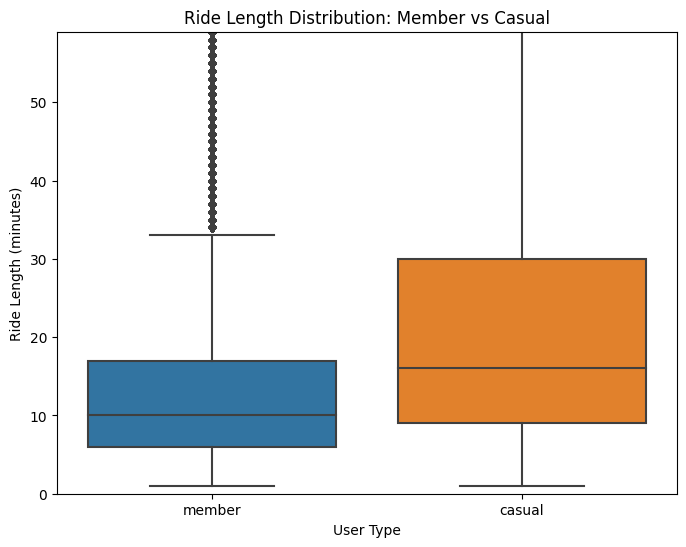

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='member_casual', y='ride_length', order=['member', 'casual'])
plt.title('Ride Length Distribution: Member vs Casual')
plt.xlabel('User Type')
plt.ylabel('Ride Length (minutes)')
plt.ylim(0, df['ride_length'].quantile(0.95))  

# Optional: trims extreme outliers for readability

plt.show()
